# MBAN 6110 Midterm

Darren Singh 216236275

In [87]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# General Flow of the Midterm

* First the data will be cleaned, then it will be spoken about in a markdown cell (Answering question 2)

* This will be followed by an exploratory analysis, it will then be discussed in a markdown cell (Answering question 1)

* Following this will be my recommendation explained in a markdown cell (Answering question 3)

In [88]:
# read in data, check info
data = pd.read_csv("C:\\Users\\darre\\Downloads\\midterm_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [89]:
# check descriptive statistics
data.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [90]:
# begin data cleaning

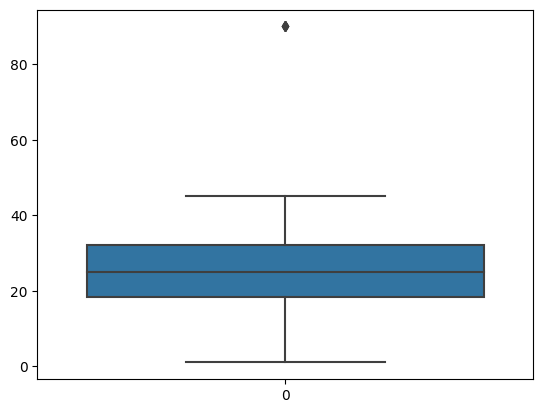

In [91]:
# time spent has a really large max relative to its 75% (90 vs 32)
# I will investigate this further with a quick box plot
sns.boxplot(data['time_spent'])
plt.show()

In [92]:
# This is an outliet, someone probably forgot the page open on their computer, this will be dropped
data = data[data['time_spent'] < 90]

In [93]:
# check if any record is missing both device and location
data[data['device'].isnull() & data['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [94]:
# This record will be dropped, there is too much missing info to reasonably impute. Replacig this info with anything will likely wrongfully skew the data.
data.drop(2130, axis=0, inplace=True)

<Axes: xlabel='device', ylabel='userID'>

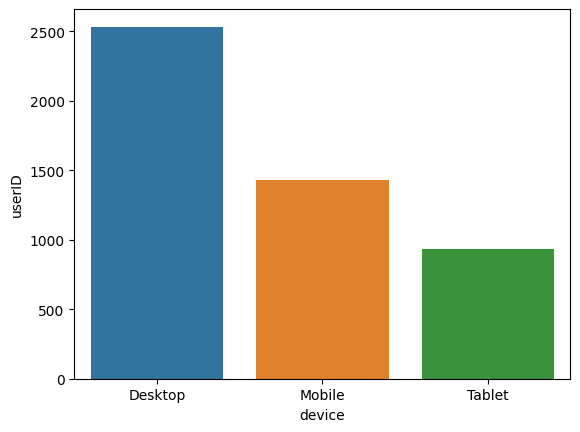

In [95]:
# explore the device column
dev = data.groupby('device')
sns.barplot(x=dev['userID'].count().index, y=dev['userID'].count())

# Majority of users are on a desktop, the least on a tablet and some on mobile

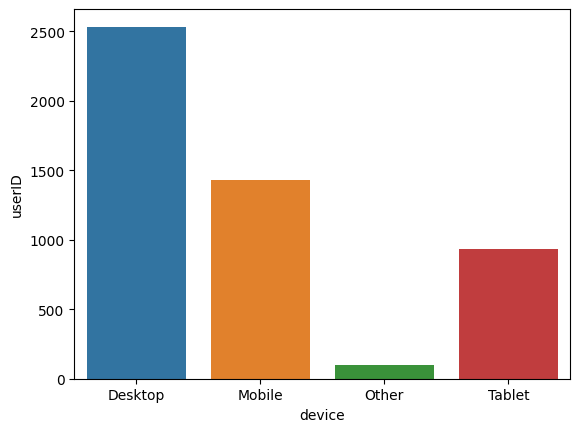

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2411.656566,41.282828,5.020202,24.800992,5.676768,14.727273,146.950606,0.222222
std,1386.399927,14.154426,2.860640,10.345199,2.802434,6.072383,68.639573,0.417855
min,80.000000,18.000000,1.000000,5.000000,1.000000,5.000000,32.500000,0.000000
25%,1226.000000,29.000000,2.000000,16.503389,4.000000,9.000000,88.090000,0.000000
50%,2379.000000,41.000000,5.000000,23.823747,5.000000,16.000000,149.640000,0.000000
75%,3541.500000,54.000000,8.000000,33.392294,8.000000,19.000000,191.700000,0.000000
max,4988.000000,65.000000,9.000000,45.000000,12.000000,25.000000,302.480000,1.000000


In [96]:
# attempt to put unknown devices into an 'other' category

# make a copy of the data
newData = data.copy()

# replace null device entries with 'other
newData['device']=newData['device'].fillna('Other')
dev = newData.groupby('device')
sns.barplot(x=dev['userID'].count().index, y=dev['userID'].count())
plt.show()
# the portion of unknown devices is very small

# Descriptive statistics of 'other' (will be discussed further later)
other = newData[newData['device']=='Other']
other.describe()


In [97]:
# Descriptive statistics of 'tablet' (will be discussed further later)
other = newData[newData['device']=='Tablet']
other.describe()


,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,2534.595289,41.844754,4.884368,25.074234,5.726981,14.910064,147.336199,0.254818
std,1452.234322,14.188990,2.625114,9.452835,2.525620,6.195151,70.304283,0.435992
min,5.000000,18.000000,1.000000,1.000000,1.000000,5.000000,29.790000,0.000000
25%,1271.250000,29.000000,3.000000,18.475673,4.000000,9.000000,87.210000,0.000000
50%,2513.000000,42.000000,5.000000,25.060218,6.000000,15.000000,140.850000,0.000000
75%,3753.250000,54.000000,7.000000,31.798240,7.000000,20.000000,197.702500,1.000000
max,5000.000000,65.000000,9.000000,45.000000,12.000000,25.000000,377.980000,1.000000


In [98]:
# Descriptive statistics of 'mobile' (will be discussed further later)
other = newData[newData['device']=='Mobile']
other.describe()


,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,2518.448880,41.724790,4.973389,24.652176,5.668067,15.132353,151.059461,0.264706
std,1457.420581,13.850712,2.583028,9.634690,2.560093,6.061816,68.707642,0.441331
min,7.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1236.750000,30.000000,3.000000,17.912291,4.000000,10.000000,94.665000,0.000000
50%,2512.500000,42.000000,5.000000,24.328060,6.000000,15.000000,144.930000,0.000000
75%,3807.750000,54.000000,7.000000,31.534705,7.000000,20.000000,201.610000,1.000000
max,4991.000000,65.000000,9.000000,45.000000,12.000000,25.000000,387.980000,1.000000


In [99]:
# Descriptive statistics of 'desktop' (will be discussed further later)
other = newData[newData['device']=='Desktop']
other.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,2481.604578,41.355170,5.112076,25.387806,5.845699,14.901736,149.361677,0.285714
std,1435.417196,14.092027,2.577972,9.712405,2.573719,5.984667,68.150963,0.451843
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,28.110000,0.000000
25%,1260.250000,29.000000,3.000000,18.585013,4.000000,10.000000,93.495000,0.000000
50%,2497.500000,41.000000,5.000000,25.366142,6.000000,15.000000,143.155000,0.000000
75%,3733.750000,54.000000,7.000000,32.167694,8.000000,20.000000,197.245000,1.000000
max,4999.000000,65.000000,9.000000,45.000000,12.000000,25.000000,427.400000,1.000000


In [100]:
# keep the new device category
data = newData

# drop null location records (discussed later)
data.dropna(subset=['location'], inplace=True)

In [101]:
# ensure there are no remaining null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4966 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4966 non-null   int64  
 1   age              4966 non-null   int64  
 2   sessions         4966 non-null   int64  
 3   time_spent       4966 non-null   float64
 4   pages_visited    4966 non-null   int64  
 5   cart_items       4966 non-null   int64  
 6   cart_value       4966 non-null   float64
 7   checkout_status  4966 non-null   int64  
 8   device           4966 non-null   object 
 9   location         4966 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 426.8+ KB


# Data Cleaning

Device and Location have missing entries, both well below 10% of the total data (10% of total data is 500 but they are missing 100 and 30 entries respectively)     

* Any record missing both location and device should be dropped, it is missing too much information and attempting to come up with values for both of these categorial columns would likely skew the data.   

* Given that the data missing in Device is a small amount it could potentially be dropped. The possibility of replacing it with a new cateogry entitled Other was explored above, but the amount of data missing is very small in comparison to the amount of data already making up the other device types. The other cateogry contains very similar descriptive statistics to the other categories as well which is a good thing. Therefore, this data will be kept in the Other column. It is worth noting that this data could also be dropped, it makes up a small portion of the data and likely will not aid in making any business decisions but since it is not that different from the other devices I will include it. It's values in the other columns could be useful for making insights.

* Records missing location data will be dropped, as they represent a very small amount of data (much less than 10%) and there is no clear way to impute a location that would not wrongfully skew the data.

* The only outlier found was one in the time_spent column, exceeding 80 minutes. This was likely someone who forgot a tab open and will be dropped.

Mean Cart Value: checkout_status
0    152.659300
1    140.725886
Name: cart_value, dtype: float64
Mean pages visited: checkout_status
0    5.200997
1    7.289513
Name: pages_visited, dtype: float64
Mean age: checkout_status
0    41.632337
1    41.280650
Name: age, dtype: float64
Mean cart items: checkout_status
0    15.285714
1    14.115214
Name: cart_items, dtype: float64


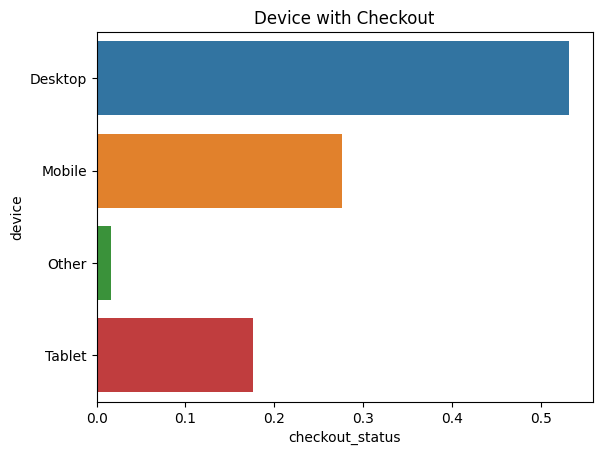

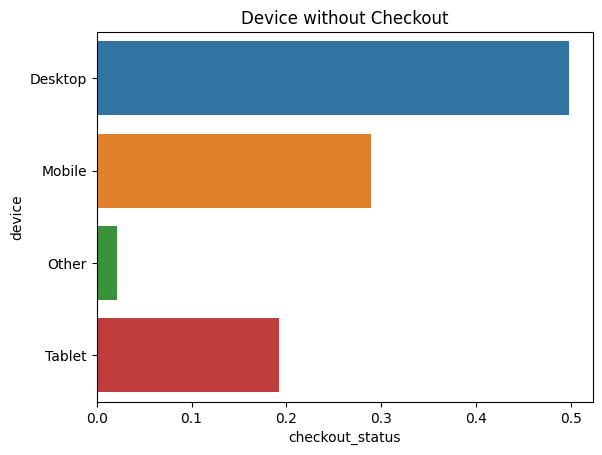

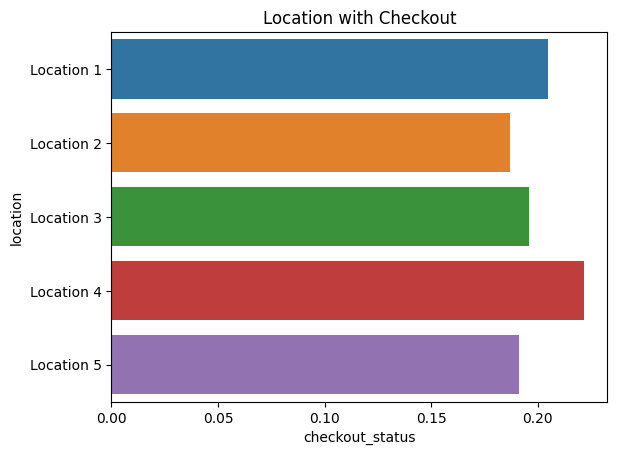

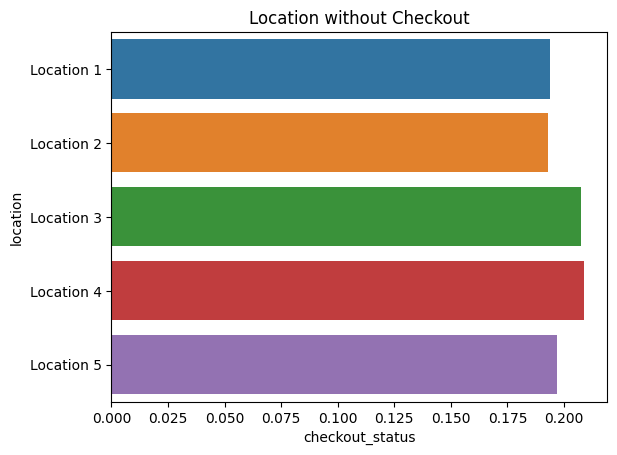

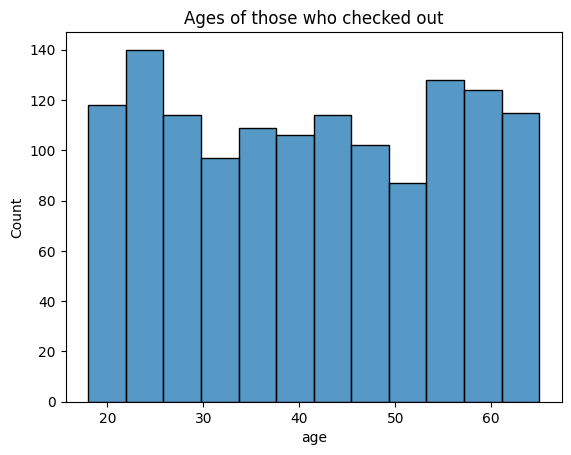

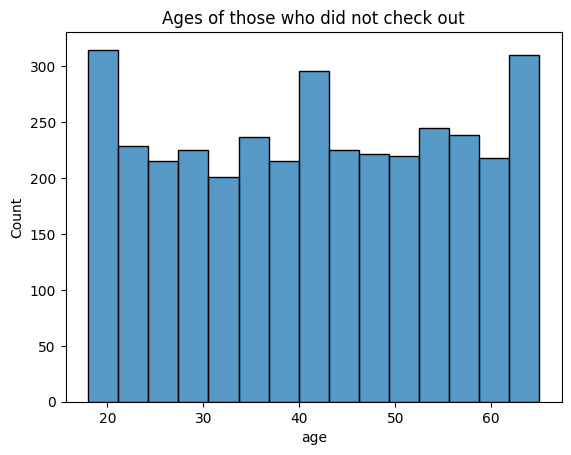

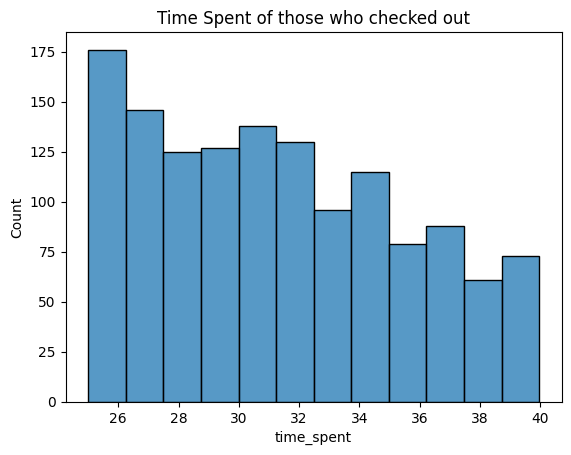

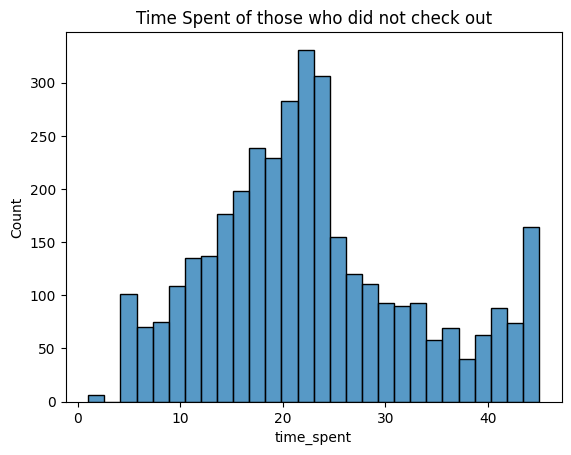

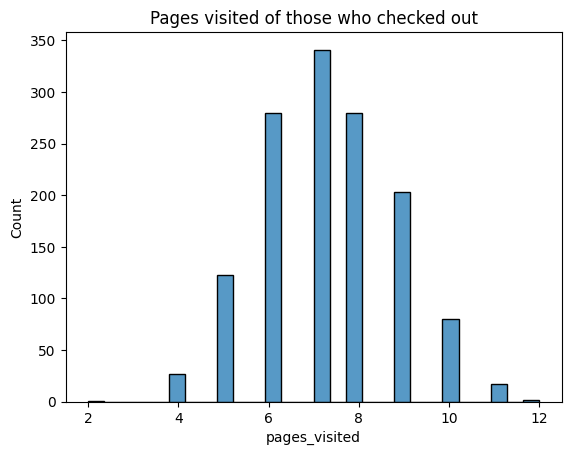

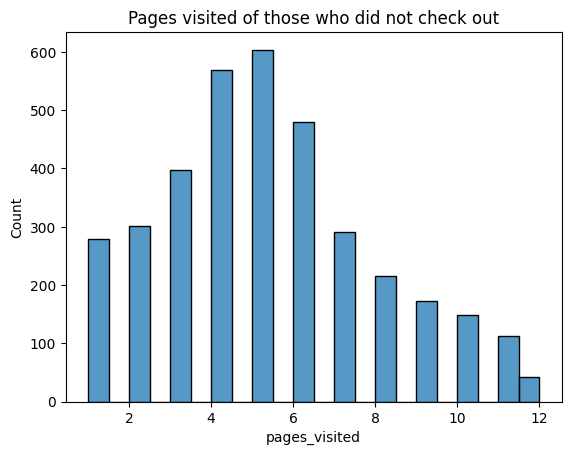

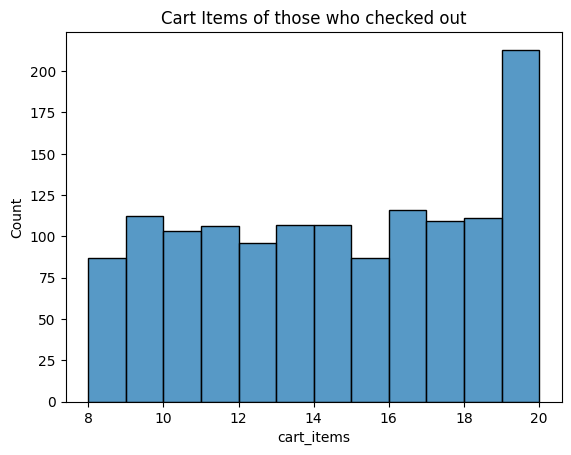

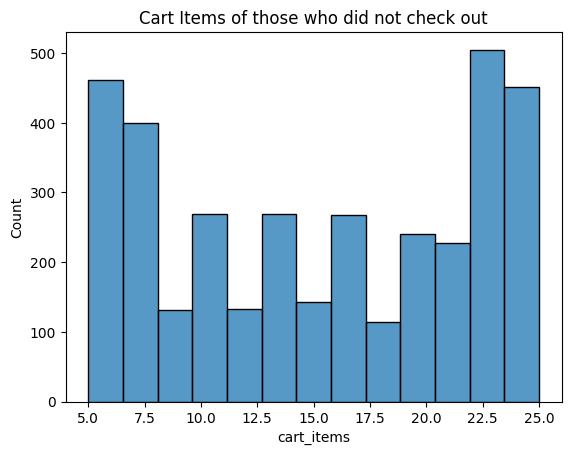

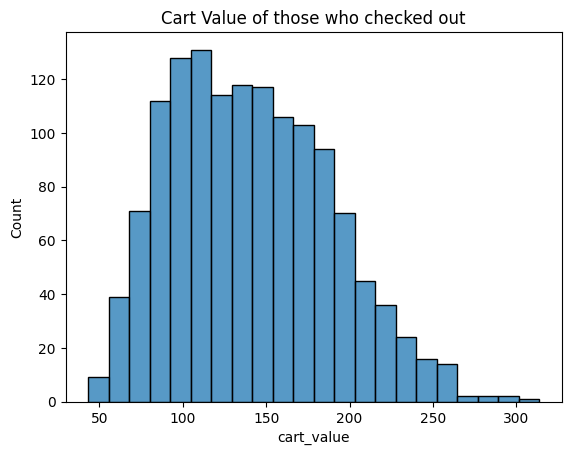

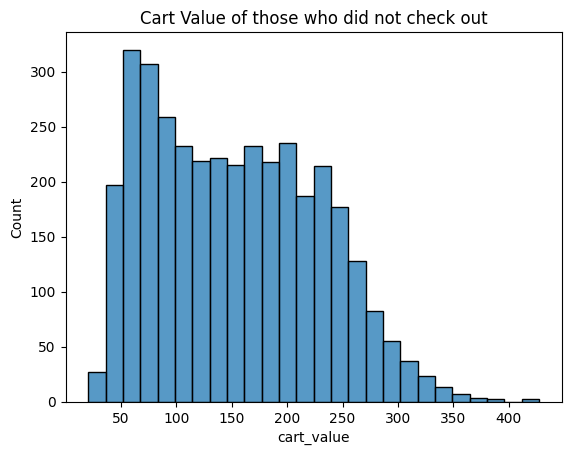

In [102]:
#Q1

### Note: This cell is largely a plotting cell, and has a very large output.

# group by the checkout rate
checkout = data.groupby('checkout_status')

# printing means of nnumeric columns

print("Mean Cart Value:", checkout['cart_value'].mean())
# ppl who checked out had slightly cheaper cart values on average

print("Mean pages visited:",checkout['pages_visited'].mean())
# ppl who checked out visited more pages on average

print("Mean age:",checkout['age'].mean())
# ppl who checked out had same age on average as those who did not

print("Mean cart items:",checkout['cart_items'].mean())
# ppl who checked out had less items in their cart than average



# now mix with device and location
# I will convert the results to a percentage for some fields.
# This makes it easier to interpret as there are different amounts of people who did and did not checkout.
# Comparisons can not be made between the counts of the two, but can be made between percentages.

# device

# filter by ppl who checked out
checkout = data[data['checkout_status']==1]
noCheckout = data[data['checkout_status']==0]

# now filter that by device
deviceCheckout = checkout.groupby('device')
deviceNoCheckout = noCheckout.groupby('device')

# plot device checkout rate as a percentage
sns.barplot(x=deviceCheckout['checkout_status'].count() / deviceCheckout['userID'].count().sum(), y=deviceCheckout['checkout_status'].count().index)
plt.title('Device with Checkout')
plt.show()
sns.barplot(x=deviceNoCheckout['checkout_status'].count() / deviceNoCheckout['userID'].count().sum(), y=deviceNoCheckout['checkout_status'].count().index)
plt.title('Device without Checkout')
plt.show()
# ratio between amounts of devices are very similar, higher amounts who did not checkout

# now do it for location
locationCheckout = checkout.groupby('location')
locationNoCheckout = noCheckout.groupby('location')

# plot location checkout rate as a percentage
sns.barplot(x=locationCheckout['checkout_status'].count() / locationCheckout['userID'].count().sum(), y=locationCheckout['checkout_status'].count().index)
plt.title('Location with Checkout')
plt.show()
sns.barplot(x=locationNoCheckout['checkout_status'].count() / locationNoCheckout['userID'].count().sum(), y=locationNoCheckout['checkout_status'].count().index)
plt.title('Location without Checkout')
plt.show()

# ages of those who check out
sns.histplot(checkout['age'])
plt.title('Ages of those who checked out')
plt.show()

# ages of those who did not check out
sns.histplot(noCheckout['age'])
plt.title('Ages of those who did not check out')
plt.show()

# time spent of those who check out
sns.histplot(checkout['time_spent'])
plt.title('Time Spent of those who checked out')
plt.show()

# time spent of those who did not check out
sns.histplot(noCheckout['time_spent'])
plt.title('Time Spent of those who did not check out')
plt.show()
# ppl who bought spent > 20 mins on site

# pages_visited of those who check out
sns.histplot(checkout['pages_visited'])
plt.title('Pages visited of those who checked out')
plt.show()

# pages visited of those who did not check out
sns.histplot(noCheckout['pages_visited'])
plt.title('Pages visited of those who did not check out')
plt.show()
# not a lot of ppl who visited less than 6 pgs bought stuff

# cart_items of those who check out
sns.histplot(checkout['cart_items'])
plt.title('Cart Items of those who checked out')
plt.show()

# cart_items of those who did not check out
sns.histplot(noCheckout['cart_items'])
plt.title('Cart Items of those who did not check out')
plt.show()
# lots of ppl who had 20 items in cart bought, >20 did not buy, <8 did not buy

# cart_value of those who check out
sns.histplot(checkout['cart_value'])
plt.title('Cart Value of those who checked out')
plt.show()

# cart_value of those who did not check out
sns.histplot(noCheckout['cart_value'])
plt.title('Cart Value of those who did not check out')
plt.show()
# value > 300 did not buy much, most people with cart values from 100-150 bought

# Question 1

People who buy:   

* On average have lower cart values, more pages visited, the same age, and fewer items in the cart than those who did not checkout

* People aged 30-50 did not checkout often compared to other ages.

* People who spent more than 40 minutes, or less than 26 minutes on the site did not checkout. Spending over 40 minutes on the website could represent people who forgot the tab open and have lost interest, whereas anything less than 40 minutes is someone actively shopping.

* Very few people who visited fewer than 6 pages checked out, additionally not very many people who visited beyond 10 pages checkedout. Visting too few pages could be indicative that the website was not able to keep their attention, and visting too many pages may mean that the user could not find what they were looking for. 

* People with cart values less than $50 did not checkout and few people with cart values greater than $300 did checkout. People not checking out with carts less than $50 may be showing that shipping costs / other costs make purchasing something less than $50 not worth it. People with carts over $300 make up a smaller portion of the market, and could sometimes be someone fooling around / forgetting that they've added items to their cart.

* The percentage of users on each device for those who did checkout vs those who didn't are almost identical. There is nothing of interest to note here.

* People in location 4 checked out the most often. People in locations 2, 3 and 5 did not check out more often than they did check out. Location 1 has approximately an equal percentage of checked out vs not checked out. Perhaps location 4 is higher income location than the others.

# Question 3

The product team must focus on:

* Keeping the customers on the website for longer periods of time (greater than 25 minutes)      

  * This also ties into having the customers view at least 6 pages, keeping them on the site longer will help achieve this    
    
 

* Ensuring the customer finds what they would like so they don't browse over 10 pages of items   

* Reduce extra costs on low dollar orders

* Increase sales in locations 2, 3 and 5

* Target people aged 30-50

How could they accomplish these things?

* Create a more interactive web experience, something to draw people in and keep them scrolling. A deals section could work, people who are just casually scrolling through the site will be inclined to stay a little longer and look at the deals of the day, similar to the deals page amazon has. This will increase the amount of time that users spend on the site and increases the chance they check more than 6 pages, thus increasing the chance that they checkout.

* Implementing a search bar or better search solution. This would allow users to search for the items they want more effectively, preventing them from having to checking 10+ pages while searching. This is likely to increase the amount of check outs because it enables customers who could not find the items they want to now do so.

* Offering promos, or reduced fees on orders below $50. This will increase the checkout rate as several customers with carts valuing under $50 did not checkout. Providing them incentives to make their purchase will increase the amount of people checking out.

  * Furthermore offering promos / free shipping / reduced prices in locations 2,3 and 5 could aid in increasing checkout rates in these locations.

* Researching and targetting the demographic of users aged 30-50. These users have lower checkout rates than other age ranges, so targetted marketting towards their specific demographc could help increase check out rates.

My Recommendation:

* I recommend that they focus on creating a more interactive/customer-focused web experience by adding items such as a deals page, a better search tool and reducing overhead fees for orders below $50. These three features combined target three key factors in increasing the amount of users who checkout. 

  * Adding a deals page will increase the amount of time a user spends on the website and likely increase the amount of pages they will scroll through. As is stated above, users who visit less than 6 pages do not checkout, so increasing the amount of pages they visit will increase the checkout rate.

  * Adding a better search tool will prevent users from scrolling through several pages before making a purchase. As is stated above, customers who scroll through more than 10 pages are not likely to checkout, a better search tool will reduce the chance of this happening by helping customers find what they want, thus increasing the checkout rate.

  * Finally, reducing the overhead costs for orders under $50 will increase the likelihood of customers with orders less than $50 checking out. As is stated and shown in plots above, there are customers with orders under $50, but none of them checkout. This could be because the cost of shipping / other fees are too great on these orders. Reducing these fees will likely cause these customers to checkout, thus increasing the checkout rate.

  * The reason that I have chosen these 3 features and not the others I listed above is because I feel these three are related (all falling under creating a more customer focused website) and can be worked on together immediately. The other changes I proposed would be good to look at later on, but for the immediate future, these changes should require minimal work (allowing them to be deployed quickly compared to the other ideas) and offer nearly immediate returns (the other ideas may take longer to see returns, such as targetting specific locations).


# Appendix

Looking back, it would have been interesting to caculate checkout rate as a percentage and have that as a metric. Or perhaps have it as another column if data was grouped.